In [2]:
import tensorflow as tf

from keras.datasets import fashion_mnist

mnist = tf.keras.datasets.fashion_mnist
(train_img, train_lbl), (test_img, test_lbl) = mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

ModuleNotFoundError: No module named 'keras'

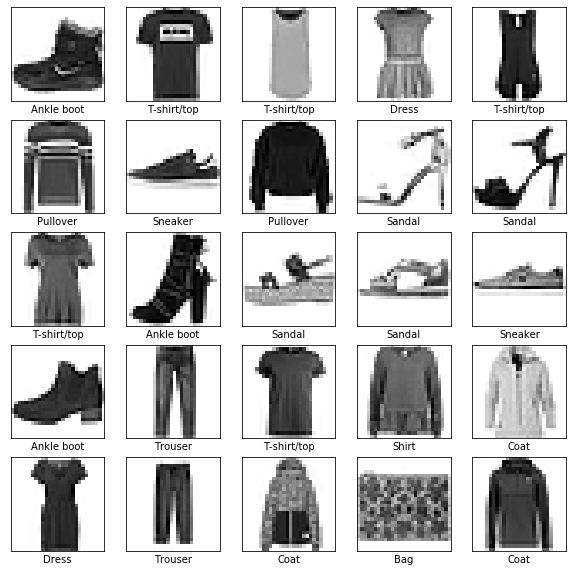

In [30]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_img[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_lbl[i]])
plt.show()

In [0]:
train_img = train_img.reshape(60000, 28, 28, 1)
test_img = test_img.reshape(10000, 28, 28, 1)

train_img = train_img/255
test_img = test_img/255

In [0]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([Conv2D(64,(3,3), activation='relu', input_shape=(28,28,1)),
                    MaxPooling2D(2,2),
                    Conv2D(64,(3,3), activation='relu'),
                    MaxPooling2D(2,2),
                    Flatten(),
                    Dense(128, activation='relu'),
                    Dense(10, activation='softmax')])

In [33]:
from keras import optimizers

model.compile(optimizer ='adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 128)               204928    
_________________________________________________________________
dense_8 (Dense)              (None, 10)               

In [34]:
import timeit

tic = timeit.default_timer()
trained_model = model.fit(train_img, train_lbl, batch_size=32, epochs=50,  verbose=1, validation_data=(test_img, test_lbl))
toc = timeit.default_timer()

print('Time: ', toc - tic) 

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 8s 140us/step - loss: 0.4424 - acc: 0.8396 - val_loss: 0.3512 - val_acc: 0.8705
Epoch 2/50
60000/60000 [==============================] - 8s 130us/step - loss: 0.2956 - acc: 0.8906 - val_loss: 0.2935 - val_acc: 0.8905
Epoch 3/50
60000/60000 [==============================] - 8s 129us/step - loss: 0.2480 - acc: 0.9079 - val_loss: 0.2664 - val_acc: 0.9028
Epoch 4/50
60000/60000 [==============================] - 8s 131us/step - loss: 0.2169 - acc: 0.9188 - val_loss: 0.2555 - val_acc: 0.9068
Epoch 5/50
60000/60000 [==============================] - 8s 129us/step - loss: 0.1903 - acc: 0.9282 - val_loss: 0.2478 - val_acc: 0.9077
Epoch 6/50
60000/60000 [==============================] - 8s 131us/step - loss: 0.1672 - acc: 0.9376 - val_loss: 0.2472 - val_acc: 0.9080
Epoch 7/50
60000/60000 [==============================] - 8s 130us/step - loss: 0.1472 - acc: 0.9452 - val_loss: 0.2602 - 

In [0]:
history = trained_model.history
acc_val = history['val_acc']
acc_tra = history['acc']

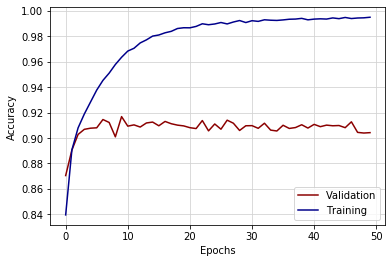

In [36]:
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(acc_val, 'darkred')
plt.plot(acc_tra, 'darkblue')
plt.legend(['Validation','Training'])
plt.grid(c='lightgrey')
plt.show()